In [1]:
#Author: Q.R Liu
#date:  Aug 6 2019

%matplotlib inline
import numpy as np
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt

import config
from physicsconstants import PhysicsConstants


/cvmfs/icecube.opensciencegrid.org/py2-v3.0.1/RHEL_7_x86_64/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Physics constants

In [2]:
param = PhysicsConstants()

Propagate the neutrino flux generated at the sun center by PYTHIA to the surface of the Sun. 

Give the channel, DM mass (GeV), energy range (GeV) and number of nodes.

In [3]:
channel = 'bb'
mass    = 1000.
Emin    = 10.
Emax    = mass
nodes   = 200

Define oscillation parameters, the default is from nuFIT v4.1 (arXiv:1811.05487) with cp phase = 0.

In [4]:
theta_12=33.82
theta_23=48.6
theta_13=8.60
delta_m_12=7.39e-5
delta_m_13=2.528e-3
delta=0.

propagate the flux. (The default cross section is based on isoscalar target from arXiv: 1106.3723v2.) 

In [5]:
flux_nu_sun = config.NuFlux('Pythia',Emin,Emax,nodes,channel,mass,param,theta_12=theta_12,theta_13=theta_13,theta_23=theta_23,delta=delta,delta_m_12=delta_m_12,delta_m_13=delta_m_13,interactions=True,location='Sunsfc')

E_range
[1.00000000e+10 1.49748744e+10 1.99497487e+10 2.49246231e+10
 2.98994975e+10 3.48743719e+10 3.98492462e+10 4.48241206e+10
 4.97989950e+10 5.47738693e+10 5.97487437e+10 6.47236181e+10
 6.96984925e+10 7.46733668e+10 7.96482412e+10 8.46231156e+10
 8.95979899e+10 9.45728643e+10 9.95477387e+10 1.04522613e+11
 1.09497487e+11 1.14472362e+11 1.19447236e+11 1.24422111e+11
 1.29396985e+11 1.34371859e+11 1.39346734e+11 1.44321608e+11
 1.49296482e+11 1.54271357e+11 1.59246231e+11 1.64221106e+11
 1.69195980e+11 1.74170854e+11 1.79145729e+11 1.84120603e+11
 1.89095477e+11 1.94070352e+11 1.99045226e+11 2.04020101e+11
 2.08994975e+11 2.13969849e+11 2.18944724e+11 2.23919598e+11
 2.28894472e+11 2.33869347e+11 2.38844221e+11 2.43819095e+11
 2.48793970e+11 2.53768844e+11 2.58743719e+11 2.63718593e+11
 2.68693467e+11 2.73668342e+11 2.78643216e+11 2.83618090e+11
 2.88592965e+11 2.93567839e+11 2.98542714e+11 3.03517588e+11
 3.08492462e+11 3.13467337e+11 3.18442211e+11 3.23417085e+11
 3.28391960e+11 

The output at the surface of sun includes the neutrino energies and the corresponding flux per annihilation of each flavor. 

In [6]:
Enu         = flux_nu_sun['Energy']
nu_e        = flux_nu_sun['nu_e']
nu_e_bar    = flux_nu_sun['nu_e_bar']
nu_mu       = flux_nu_sun['nu_mu']
nu_mu_bar   = flux_nu_sun['nu_mu_bar']
nu_tau      = flux_nu_sun['nu_tau']
nu_tau_bar  = flux_nu_sun['nu_tau_bar']

Plot the flux of muon neutrinos.

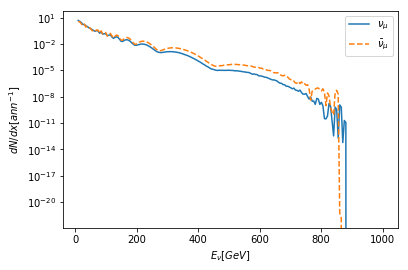

In [7]:
plt.plot(Enu/param.GeV,nu_mu,linestyle='-',label=r'$\nu_\mu$')
plt.plot(Enu/param.GeV,nu_mu_bar,linestyle='--',label=r'$\bar{\nu}_\mu$')
plt.yscale('log')
plt.xlabel(r'$E_\nu [GeV]$')
plt.ylabel(r'$dN/dx [ann^{-1}]$')
plt.legend()
plt.show()

We can also propagate the neutrino flux to the detector.

The latitude of the detector needs to be specified. (Default is IC which is -90.)

Since the relative locations of the Sun and the Earth change with time, the flux is time dependent. Either time or zenith angle can be specified. If both are given, zenith angle is read.


In [8]:
flux_nu_earth = config.NuFlux('Pythia',Emin,Emax,nodes,channel,mass,param,interactions=True,location='Earth',latitude=-90,angle=120.,)

E_range
[1.00000000e+10 1.49748744e+10 1.99497487e+10 2.49246231e+10
 2.98994975e+10 3.48743719e+10 3.98492462e+10 4.48241206e+10
 4.97989950e+10 5.47738693e+10 5.97487437e+10 6.47236181e+10
 6.96984925e+10 7.46733668e+10 7.96482412e+10 8.46231156e+10
 8.95979899e+10 9.45728643e+10 9.95477387e+10 1.04522613e+11
 1.09497487e+11 1.14472362e+11 1.19447236e+11 1.24422111e+11
 1.29396985e+11 1.34371859e+11 1.39346734e+11 1.44321608e+11
 1.49296482e+11 1.54271357e+11 1.59246231e+11 1.64221106e+11
 1.69195980e+11 1.74170854e+11 1.79145729e+11 1.84120603e+11
 1.89095477e+11 1.94070352e+11 1.99045226e+11 2.04020101e+11
 2.08994975e+11 2.13969849e+11 2.18944724e+11 2.23919598e+11
 2.28894472e+11 2.33869347e+11 2.38844221e+11 2.43819095e+11
 2.48793970e+11 2.53768844e+11 2.58743719e+11 2.63718593e+11
 2.68693467e+11 2.73668342e+11 2.78643216e+11 2.83618090e+11
 2.88592965e+11 2.93567839e+11 2.98542714e+11 3.03517588e+11
 3.08492462e+11 3.13467337e+11 3.18442211e+11 3.23417085e+11
 3.28391960e+11 

120.0
149603185.398255 149596770.623065 6414.77518957


The output at the detector includes the neutrino energies, the corresponding flux per annihilation of each flavor and the zenith angle.

In [9]:
Enu         = flux_nu_earth['Energy']
nu_e        = flux_nu_earth['nu_e']
nu_e_bar    = flux_nu_earth['nu_e_bar']
nu_mu       = flux_nu_earth['nu_mu']
nu_mu_bar   = flux_nu_earth['nu_mu_bar']
nu_tau      = flux_nu_earth['nu_tau']
nu_tau_bar  = flux_nu_earth['nu_tau_bar']
zenith      = flux_nu_earth['zenith']

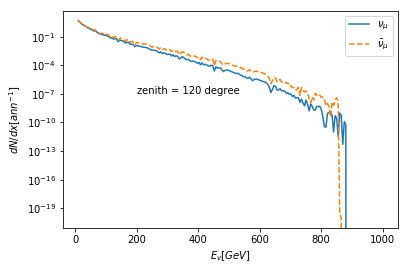

In [10]:
plt.plot(Enu/param.GeV,nu_mu,linestyle='-',label=r'$\nu_\mu$')
plt.plot(Enu/param.GeV,nu_mu_bar,linestyle='--',label=r'$\bar{\nu}_\mu$')
plt.text(200, 1e-7,'zenith = 120 degree')
plt.yscale('log')
plt.xlabel(r'$E_\nu [GeV]$')
plt.ylabel(r'$dN/dx [ann^{-1}]$')
plt.legend()
plt.show()